In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Storing Data in df

In [2]:
df = pd.read_csv("Clean_Dataset.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [4]:
headers = list(df.columns)

In [5]:
for column in df.columns:
    if column != 'duration' and column != 'price' and column != 'days_left' and column != 'Unnamed: 0' and column != 'flight':
        print(f"{column}: \n{df[column].unique()}\n\n")

airline: 
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


source_city: 
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']


departure_time: 
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']


stops: 
['zero' 'one' 'two_or_more']


arrival_time: 
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']


destination_city: 
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']


class: 
['Economy' 'Business']




# Visualization

<Axes: xlabel='airline', ylabel='price'>

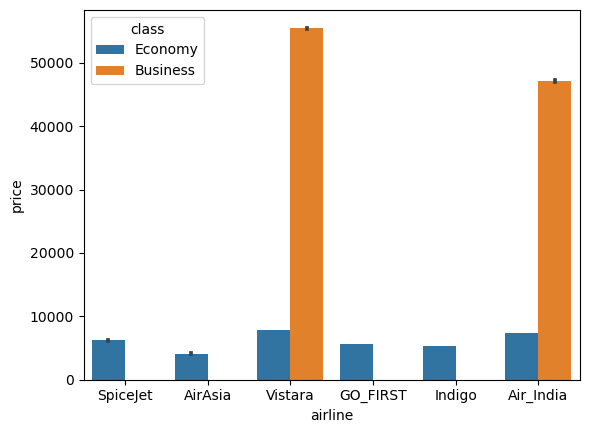

In [6]:
sns.barplot(data=df, x='airline', y='price', hue='class')

Therefore, Yes, Price varies with Airlines.
Clearly, in Economy Class Vistara is the most expensive and Air Asia is the least expensive whereas,
in the Business Class, Vistara is the most expensive and Air India is the least expensive

<Axes: xlabel='days_left', ylabel='price'>

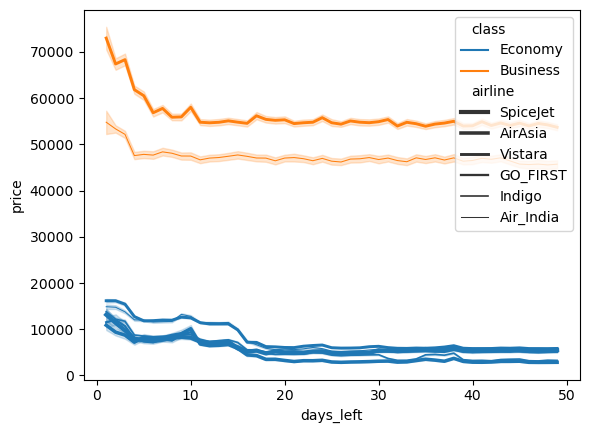

In [7]:
sns.lineplot(data=df, x='days_left', y='price', hue='class', size='airline')

In [8]:
result_df = pd.DataFrame(columns=['city', 'p_class', 'mean_ticket_price'])

for city in df.source_city.unique():
    for p_class in df['class'].unique():
        mean_ticket_price = df.loc[(df['source_city'] == city) & (df['class'] == p_class)].price.mean()
        result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
                                     ignore_index=True)

C:\Users\CHAITANYA\AppData\Local\Temp\ipykernel_3544\2127665196.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
C:\Users\CHAITANYA\AppData\Local\Temp\ipykernel_3544\2127665196.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
C:\Users\CHAITANYA\AppData\Local\Temp\ipykernel_3544\2127665196.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
C:\Users\CHAITANYA\AppData\Local\Temp\ipykernel_3544\2127665196.py:6: 

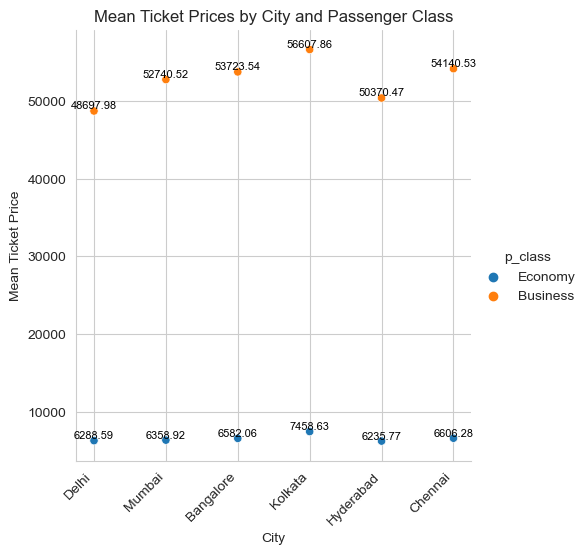

In [9]:
sns.set_style('whitegrid')
g = sns.relplot(data=result_df, x='city', y='mean_ticket_price', hue='p_class')
for _, row in result_df.iterrows():
    g.ax.text(row['city'], row['mean_ticket_price'], f'{row["mean_ticket_price"]:.2f}',
              color='black', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.title('Mean Ticket Prices by City and Passenger Class')
plt.xlabel('City')
plt.ylabel('Mean Ticket Price')
plt.show()

C:\Users\CHAITANYA\AppData\Local\Temp\ipykernel_3544\4125383038.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  g = sns.heatmap(data=result_df.pivot('city', 'p_class', 'mean_ticket_price'), cmap='RdYlBu_r', annot=True, fmt='.2f')


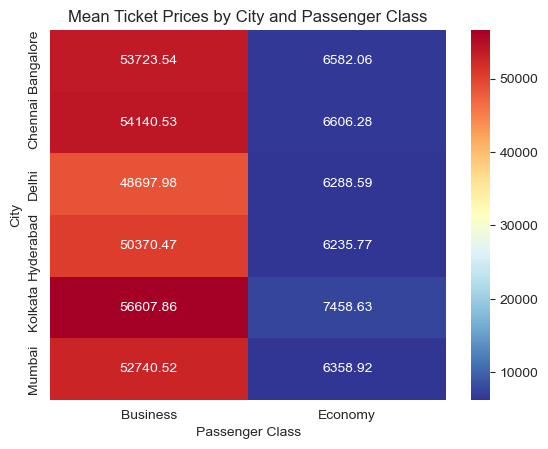

In [10]:
sns.set_style('whitegrid')
g = sns.heatmap(data=result_df.pivot('city', 'p_class', 'mean_ticket_price'), cmap='RdYlBu_r', annot=True, fmt='.2f')
g.set_title('Mean Ticket Prices by City and Passenger Class')
g.set_xlabel('Passenger Class')
g.set_ylabel('City')
plt.show()

# HEATMAP

# Data Preprocessing

#### Checking and replacing null values

In [11]:
df.isnull().any()

Unnamed: 0          False
airline             False
flight              False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

In [12]:
df = df.drop('Unnamed: 0',axis = 1)

In [13]:
df = df.drop('flight',axis = 1)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


#### Dealing with outliers in price column

<Axes: >

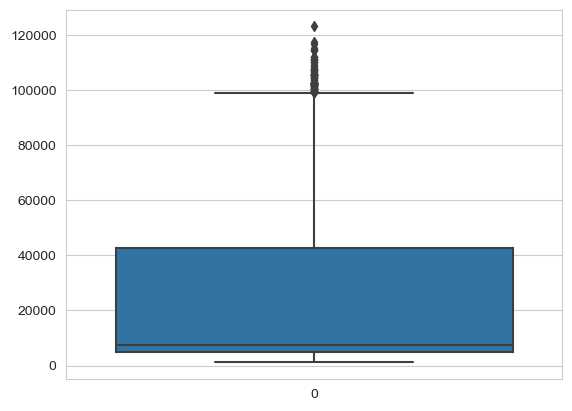

In [14]:
sns.boxplot(df.price)

In [15]:
# Removing outliers
uppertresh = df['price'].quantile(0.99)
df = df[(df['price']<uppertresh)]

<Axes: >

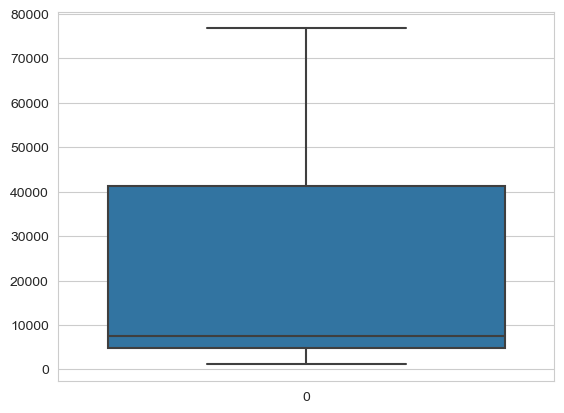

In [16]:
sns.boxplot(df.price)

In [17]:
model_df = df.copy()
model_df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300144,Air_India,Chennai,Evening,one,Morning,Hyderabad,Business,18.92,49,51345
300145,Air_India,Chennai,Morning,one,Morning,Hyderabad,Business,23.08,49,51345
300146,Air_India,Chennai,Early_Morning,one,Morning,Hyderabad,Business,26.83,49,51345
300147,Air_India,Chennai,Early_Morning,one,Night,Hyderabad,Business,17.25,49,68739


In [18]:
df = model_df
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


#### Target Encoding independent variables

In [19]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [20]:
import category_encoders as ce

te = ce.TargetEncoder(cols=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class'])
df = te.fit_transform(df, df['price'])


In [21]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Scaling Data

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_scaled=sc.fit_transform(X)
name = X.columns

x_scaled


array([[0.08341388, 0.        , 0.84488645, ..., 0.        , 0.02734694,
        0.        ],
       [0.08341388, 0.        , 0.80022357, ..., 0.        , 0.03061224,
        0.        ],
       [0.        , 0.        , 0.80022357, ..., 0.        , 0.02734694,
        0.        ],
       ...,
       [0.77401411, 1.        , 0.80022357, ..., 1.        , 0.53061224,
        1.        ],
       [0.77401411, 1.        , 0.80022357, ..., 1.        , 0.33510204,
        1.        ],
       [1.        , 1.        , 0.86273039, ..., 1.        , 0.18877551,
        1.        ]])

In [23]:
data = pd.DataFrame(x_scaled,columns=name)
data
#data.to_csv("E:\Externship-ADS\Project\my_CSV")

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0.083414,0.0,0.844886,0.0,0.849471,0.729765,0.0,0.027347,0.0
1,0.083414,0.0,0.800224,0.0,0.930503,0.729765,0.0,0.030612,0.0
2,0.000000,0.0,0.800224,0.0,0.312338,0.729765,0.0,0.027347,0.0
3,1.000000,0.0,0.862730,0.0,0.633827,0.729765,0.0,0.028980,0.0
4,1.000000,0.0,0.862730,0.0,0.930503,0.729765,0.0,0.030612,0.0
...,...,...,...,...,...,...,...,...,...
297138,0.774014,1.0,0.844886,1.0,0.930503,0.543835,1.0,0.369184,1.0
297139,0.774014,1.0,0.862730,1.0,0.930503,0.543835,1.0,0.454082,1.0
297140,0.774014,1.0,0.800224,1.0,0.930503,0.543835,1.0,0.530612,1.0
297141,0.774014,1.0,0.800224,1.0,0.849471,0.543835,1.0,0.335102,1.0


# Ensembling

In [24]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [25]:
rfr=RandomForestRegressor()
ad=AdaBoostRegressor()
gd=GradientBoostingRegressor()

In [26]:
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)
for i in [rfr,ad,gd]:
    i.fit(X_train,y_train)
    pred=i.predict(X_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(X_train))
    if abs(train_score - test_score)<=0.2:
        print(i)
        print('R2 score is ',r2_score(y_test,pred))
        print('R2 for train data',r2_score(y_train,i.predict(X_train)))
        print('Mean absolute error is ',mean_absolute_error(y_test,pred))
        print('Mean squared error is ',mean_squared_error(y_test,pred))
        print('RMSE: ',(mean_squared_error(y_test,pred,squared=False)))

RandomForestRegressor()
R2 score is  0.9890607369283724
R2 for train data 0.9981929277474162
Mean absolute error is  961.6458866721457
Mean squared error is  5261907.826442419
RMSE:  2293.884876457931
AdaBoostRegressor()
R2 score is  0.9370783500160784
R2 for train data 0.9374776732112988
Mean absolute error is  4046.117080947727
Mean squared error is  30266017.037453357
RMSE:  5501.45590161853
GradientBoostingRegressor()
R2 score is  0.9597780246792856
R2 for train data 0.9598132762366156
Mean absolute error is  2727.199787741915
Mean squared error is  19347219.76692988
RMSE:  4398.547461029593


# CROSS VALIDATION

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
for i in range(2,3):
    cv=cross_val_score(rfr,X,y,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor() -0.38131928697636025


In [29]:
for i in range(2,4):
    cv=cross_val_score(gd,X,y,cv=i)
    print(gd,cv.mean())

GradientBoostingRegressor() -0.35344262661813697
GradientBoostingRegressor() -1.48898945449782


In [30]:
for i in range(2,4):
    cv=cross_val_score(ad,X,y,cv=i)
    print(ad,cv.mean())

AdaBoostRegressor() -0.4483140346074225
AdaBoostRegressor() -1.6171194675155594


# Regression model

In [31]:
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [33]:
dt=DecisionTreeRegressor()
knn=KNeighborsRegressor()
lr=LinearRegression()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
for i in [dt,lr,knn]:
    i.fit(X_train,y_train)
    pred=i.predict(X_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(X_train))
    if abs(train_score - test_score)<=0.1:
        print(i)
        print('R2 score is ',r2_score(y_test,pred))
        print('R2 for train data',r2_score(y_train,i.predict(X_train)))
        print('Mean absolute error is ',mean_absolute_error(y_test,pred))
        print('Mean squared error is ',mean_squared_error(y_test,pred))
        print('RMSE: ',(mean_squared_error(y_test,pred,squared=False)))

DecisionTreeRegressor()
R2 score is  0.9827011436821368
R2 for train data 0.9995638140662058
Mean absolute error is  1009.818179778558
Mean squared error is  8288131.647111944
RMSE:  2878.911538604815
LinearRegression()
R2 score is  0.9126485166696252
R2 for train data 0.9130148738423817
Mean absolute error is  4390.022908337504
Mean squared error is  41851355.95727524
RMSE:  6469.26239669371
KNeighborsRegressor()
R2 score is  0.9767361082172112
R2 for train data 0.985071574611073
Mean absolute error is  1733.6788620531058
Mean squared error is  11146066.200966984
RMSE:  3338.5724795138094


In [35]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [36]:
for i in range(2,4):
    cv=cross_val_score(knn,X,y,cv=i)
    print(knn,cv.mean())

KNeighborsRegressor() -0.4456876008844893
KNeighborsRegressor() -1.630164408908967


In [37]:
for i in range(2,4):
    cv=cross_val_score(lr,X,y,cv=i)
    print(lr,cv.mean())

LinearRegression() -1.230408623740565
LinearRegression() -2.1075782136569727


In [38]:
cv_s=cross_val_score(lr,X,y,cv=5)
cp=cross_val_predict(lr,X,y,cv=5)
print("Accuracy score in each iteration: {}".format(cv_s))
print(lr,cv.mean())
print("K-Fold Score: {}".format(np.mean(cv_s)))

Accuracy score in each iteration: [-0.50820183 -0.16575181  0.0020768   0.85503432  0.06214526]
LinearRegression() -2.1075782136569727
K-Fold Score: 0.04906054826412962


# Hyperparameter tuning

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [40]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1, 2, 5, 10]

In [41]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [42]:
rf_random = RandomizedSearchCV(estimator = gd, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 3, 
                               verbose=2, random_state=0, n_jobs = 1)

In [43]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75; total time=  16.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75; total time=  16.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75; total time=  16.1s


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34; total time=  13.9s


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34; total time=  14.0s


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34; total time=  14.1s


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=83; total time=  33.4s


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=83; total time=  36.1s


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=83; total time=  38.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67; total time=   7.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67; total time=   6.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67; total time=   7.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=34; total time=   4.8s
[CV] END max_depth=20, max_features

C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=18; total time=   6.4s


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=18; total time=   6.5s


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=18; total time=   6.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=18; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=18; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=18; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=26; total time=   4.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=26; total time=   4.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=26; total time=   4.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=42; total time=   7.4s
[CV] END max_depth=20, max_features=sqrt, mi

C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\CHAITANYA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 18, 26, 34, 42, 50,
                                                         59, 67, 75, 83, 91,
                                                         100]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [44]:
rf_random.best_params_

{'n_estimators': 83,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 20}

In [45]:
gd_model = GradientBoostingRegressor(alpha=0.09,n_estimators= 83,min_samples_split= 10,min_samples_leaf= 10,max_depth= 20,learning_rate=0.1)
gd_model

GradientBoostingRegressor(alpha=0.09, max_depth=20, min_samples_leaf=10,
                          min_samples_split=10, n_estimators=83)

In [46]:
gd_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.09, max_depth=20, min_samples_leaf=10,
                          min_samples_split=10, n_estimators=83)

In [47]:
pred2 = gd_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error 


gd_model_mae = mean_absolute_error(y_test, pred2)
gd_model_r2 = r2_score(y_test, pred2)
gd_model_mse = mean_squared_error(y_test, pred2)


print("Mean Absolute Error: ", gd_model_mae)
print("R-squared:", gd_model_r2)
print("Mean Squared Error: ", gd_model_mse)

Mean Absolute Error:  1032.696514578998
R-squared: 0.9901364737866111
Mean Squared Error:  4725757.718265482


In [48]:
pd.DataFrame(data={'predicted price': pred2, 'actual price': y_test})

,predicted price,actual price
228663,40939.972353,41101
63271,10621.437656,9879
163713,4103.507646,4165
11074,14721.624064,12321
257428,57009.889775,56588
...,...,...
176839,12005.418837,12033
75589,4615.679562,3098
8086,6223.520255,6933
134355,5866.139702,5888


In [49]:
import pickle
file = open('flight_rf.pkl', 'wb')
pickle.dump(gd_model,file)